In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

In [2]:
delays_df = pd.read_csv('FlightDelays.csv')

In [3]:
delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [4]:
delays_df.columns=[s.strip().replace(' ','_') for s in delays_df.columns]

In [5]:
delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


# A. Data Preprocessing 

## 1) Data Reduction:

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

In [7]:
delays_df.to_csv('Flight.csv', encoding='utf-8',index = False)

In [8]:
# Read the data file
corr_df = pd.read_csv('Flight.csv')
corr_df=corr_df.drop('FL_DATE', axis=1, inplace=False)
corr_df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,2216,DCA,0,6,31,N16961,ontime


In [9]:
list_str_obj_cols = corr_df.columns[corr_df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    corr_df[str_obj_col] = corr_df[str_obj_col].astype("category")
    
corr_df.dtypes

CRS_DEP_TIME        int64
CARRIER          category
DEP_TIME            int64
DEST             category
DISTANCE            int64
FL_NUM              int64
ORIGIN           category
Weather             int64
DAY_WEEK            int64
DAY_OF_MONTH        int64
TAIL_NUM         category
Flight_Status    category
dtype: object

In [10]:
cat_columns = corr_df.select_dtypes('category').columns

In [11]:
print(cat_columns)

Index(['CARRIER', 'DEST', 'ORIGIN', 'TAIL_NUM', 'Flight_Status'], dtype='object')


In [12]:
corr_df[cat_columns] = corr_df[cat_columns].apply(lambda x: x.cat.codes)

In [13]:
#corr_df = corr_df.replace({'Flight_Status': {'ontime': 1, 'delayed': 0}})

In [14]:
corr_df.dtypes

CRS_DEP_TIME     int64
CARRIER           int8
DEP_TIME         int64
DEST              int8
DISTANCE         int64
FL_NUM           int64
ORIGIN            int8
Weather          int64
DAY_WEEK         int64
DAY_OF_MONTH     int64
TAIL_NUM         int16
Flight_Status     int8
dtype: object

In [15]:
corr_df.corr().round(2)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
CRS_DEP_TIME,1.00,-0.08,0.98,-0.02,0.06,0.09,0.06,-0.01,0.05,0.00,0.01,-0.11
CARRIER,-0.08,1.00,-0.11,0.15,-0.28,-0.52,-0.40,-0.04,-0.01,0.00,0.22,0.10
DEP_TIME,0.98,-0.11,1.00,-0.04,0.06,0.11,0.07,0.02,0.05,0.00,0.00,-0.17
DEST,-0.02,0.15,-0.04,1.00,0.51,-0.10,-0.10,0.00,-0.05,0.02,0.55,0.09
DISTANCE,0.06,-0.28,0.06,0.51,1.00,0.42,0.76,0.03,-0.02,0.01,0.39,0.02
FL_NUM,0.09,-0.52,0.11,-0.10,0.42,1.00,0.59,0.04,0.02,-0.01,0.22,-0.10
ORIGIN,0.06,-0.40,0.07,-0.10,0.76,0.59,1.00,0.03,0.00,-0.00,0.02,-0.06
Weather,-0.01,-0.04,0.02,0.00,0.03,0.04,0.03,1.00,-0.12,0.14,0.02,-0.25
DAY_WEEK,0.05,-0.01,0.05,-0.05,-0.02,0.02,0.00,-0.12,1.00,0.02,-0.02,0.04
DAY_OF_MONTH,0.00,0.00,0.00,0.02,0.01,-0.01,-0.00,0.14,0.02,1.00,0.01,-0.07


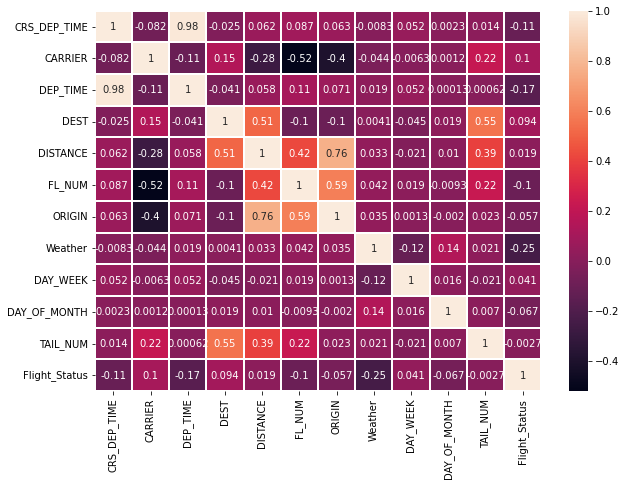

In [16]:
corrMatrix = corr_df.corr()
fig, ax = plt.subplots(figsize=(10,7))         # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True,linewidths=2, ax=ax)
plt.show()

In [17]:
# Deleting colums which are not importatnt as part of the analysis.
corr_df.drop(['CRS_DEP_TIME','DEP_TIME','DAY_OF_MONTH','DISTANCE','FL_NUM','TAIL_NUM'], axis=1, inplace=True)

In [18]:
corr_df.head()

,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,Flight_Status
0,4,1,0,0,4,1
1,1,1,1,0,4,1
2,1,2,2,0,4,1
3,1,2,2,0,4,1
4,1,2,2,0,4,1


In [19]:
corr_df.to_csv('FlightDelaysTrainingData.csv', encoding='utf-8',index = False)

In [20]:
corr_df.head()

,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,Flight_Status
0,4,1,0,0,4,1
1,1,1,1,0,4,1
2,1,2,2,0,4,1
3,1,2,2,0,4,1
4,1,2,2,0,4,1


In [21]:
#Convert the DAY_WEEK column from numerical data into categorical data. This column will have 31 categories
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

## 2) Data Exploration

In [22]:
#Copying and Renaming File
def copy_rename_csv(filename):
    copy_df = pd.read_csv(filename)
    copy_df.to_csv('FlightDelaysDataExploration.csv', encoding='utf-8',index = False)
copy_rename_csv('FlightDelaysTrainingData.csv')

In [23]:
explore_df = pd.read_csv('FlightDelaysDataExploration.csv')

In [24]:
explore_df.head()

,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,Flight_Status
0,4,1,0,0,4,1
1,1,1,1,0,4,1
2,1,2,2,0,4,1
3,1,2,2,0,4,1
4,1,2,2,0,4,1


In [25]:
explore_df.CARRIER = delays_df.CARRIER.astype('category')
explore_df.DEST = delays_df.DEST.astype('category')
explore_df.ORIGIN = delays_df.ORIGIN.astype('category')
explore_df.Weather = delays_df.Weather.astype('category')
explore_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')

explore_df.Flight_Status = delays_df.Flight_Status.astype('category')

In [26]:
predictors = ['CARRIER','DEST','ORIGIN','DAY_WEEK']
outcome = 'Flight_Status'

In [27]:
X = predictors
y = explore_df['Flight_Status']
classes = ['ontime', 'delayed']

In [28]:
#Pivot Table Trial
# split the original data frame into a train and test using the same random_state
train_df, valid_df = train_test_split(explore_df, test_size=0.4, random_state=1)

pd.set_option('precision', 4)
# probability of flight status
print(train_df['Flight_Status'].value_counts() / len(train_df))
print()

for predictor in predictors:
    # construct the frequency table
    df = train_df[['Flight_Status', predictor]]
    freqTable = df.pivot_table(index='Flight_Status', columns=predictor,
aggfunc=len)
    # divide each value by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()
pd.reset_option('precision')

ontime     0.8023
delayed    0.1977
Name: Flight_Status, dtype: float64

CARRIER            CO      DH      DL      MQ      OH      RU      UA      US
Flight_Status                                                                
delayed        0.0575  0.3142  0.0958  0.2222  0.0077  0.2184  0.0153  0.0690
ontime         0.0349  0.2295  0.2040  0.1171  0.0104  0.1690  0.0170  0.2181

DEST              EWR     JFK     LGA
Flight_Status                        
delayed        0.3793  0.1992  0.4215
ontime         0.2663  0.1558  0.5779

ORIGIN            BWI     DCA     IAD
Flight_Status                        
delayed        0.0805  0.5211  0.3985
ontime         0.0604  0.6478  0.2918

DAY_WEEK            1       2       3       4       5      6       7
Flight_Status                                                       
delayed        0.1916  0.1494  0.1149  0.1264  0.1877  0.069  0.1609
ontime         0.1246  0.1416  0.1445  0.1794  0.1690  0.136  0.1048



In [29]:
explore_df.pivot_table('Weather', index=['Flight_Status','ORIGIN','DEST'], columns=['DAY_WEEK'], aggfunc='count', margins= False)

DAY_WEEK                     1    2    3    4    5   6   7
Flight_Status ORIGIN DEST                                 
delayed       BWI    EWR     5    5    4    3    7   1   8
                     JFK     1    0    0    1    1   0   1
                     LGA     0    0    0    0    0   0   0
              DCA    EWR    11    9    9    8    9   0   8
                     JFK     6    6    1    4    5   7  11
                     LGA    25   16   24   24   22   3  13
              IAD    EWR    15   11   10    5   16   4  13
                     JFK     8    9    4    0    3   8   8
                     LGA    13    7    5   12   12   1   6
ontime        BWI    EWR     8    8   11   16   13  19   7
                     JFK     3    4    4    4    4   4   3
                     LGA     0    0    0    0    0   0   0
              DCA    EWR    25   24   29   37   40  30  17
                     JFK    11   12   17   21   19  17  12
                     LGA   118  131  124  143  151  80  91
              IAD    EWR    26   29   33   44   37  32  19
                     JFK    18   17   24   33   32  23  20
                     LGA    15   19   21   17   20  21  16

## 3) Data Conversion

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [31]:
enc = LabelEncoder()
enc = preprocessing.LabelEncoder()
explore_df['CARRIER_n'] = enc.fit_transform(explore_df['CARRIER'])
explore_df['DEST_n'] = enc.fit_transform(explore_df['DEST'])
explore_df['ORIGIN_n'] = enc.fit_transform(explore_df['ORIGIN'])

explore_df['Flight_Status_n'] = enc.fit_transform(explore_df['Flight_Status'])

In [32]:
explore_df.head()

,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,Flight_Status,CARRIER_n,DEST_n,ORIGIN_n,Flight_Status_n
0,OH,JFK,BWI,0,4,ontime,4,1,0,1
1,DH,JFK,DCA,0,4,ontime,1,1,1,1
2,DH,LGA,IAD,0,4,ontime,1,2,2,1
3,DH,LGA,IAD,0,4,ontime,1,2,2,1
4,DH,LGA,IAD,0,4,ontime,1,2,2,1


In [33]:
#Creating Reference Table for Transformed Data
enc.fit(explore_df['CARRIER'])
enc_name_carrier = dict(zip(enc.classes_,enc.transform(enc.classes_)))
enc.fit(explore_df['DEST'])
enc_name_dest = dict(zip(enc.classes_,enc.transform(enc.classes_)))
enc.fit(explore_df['ORIGIN'])
enc_name_origin = dict(zip(enc.classes_,enc.transform(enc.classes_)))

enc.fit(explore_df['Flight_Status'])
enc_name_status = dict(zip(enc.classes_,enc.transform(enc.classes_)))
print(enc_name_carrier)
print(enc_name_dest)
print(enc_name_origin)
print(enc_name_status)

{'CO': 0, 'DH': 1, 'DL': 2, 'MQ': 3, 'OH': 4, 'RU': 5, 'UA': 6, 'US': 7}
{'EWR': 0, 'JFK': 1, 'LGA': 2}
{'BWI': 0, 'DCA': 1, 'IAD': 2}
{'delayed': 0, 'ontime': 1}


In [34]:
pip install mord

Note: you may need to restart the kernel to use updated packages.


# B. MODEL BUILDING

## 1) Logistic Regression


In [35]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import mord as m
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [36]:
explore_df.head()

,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,Flight_Status,CARRIER_n,DEST_n,ORIGIN_n,Flight_Status_n
0,OH,JFK,BWI,0,4,ontime,4,1,0,1
1,DH,JFK,DCA,0,4,ontime,1,1,1,1
2,DH,LGA,IAD,0,4,ontime,1,2,2,1
3,DH,LGA,IAD,0,4,ontime,1,2,2,1
4,DH,LGA,IAD,0,4,ontime,1,2,2,1


In [37]:
#Split the data into training (60%) and testing (40%)
predictors = ['CARRIER_n','DEST_n','ORIGIN_n','DAY_WEEK','Weather']
outcome = 'Flight_Status_n'

In [38]:
X = explore_df[predictors]
y = explore_df['Flight_Status_n']
classes = ['ontime', 'delayed']

In [39]:
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)


LogisticRegression(C=1e+42, solver='liblinear')

In [41]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  0.7252672496810844
       CARRIER_n    DEST_n  ORIGIN_n  DAY_WEEK   Weather
coeff   0.099958  0.331721 -0.033253  0.022706 -8.789527

AIC 716.3932066806701


In [42]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

In [43]:
# training confusion matrix
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8156)

       Prediction
Actual    0    1
     0   20  284
     1    0 1236


In [44]:
# validation confusion matrix
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8306)

       Prediction
Actual   0   1
     0  12 112
     1   0 537


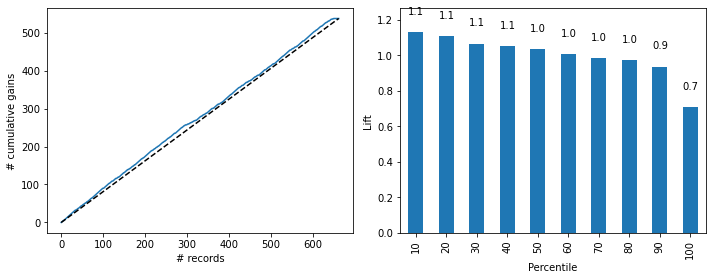

In [45]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.tight_layout()
plt.show()

In [46]:
#Test the TestingData.csv
train_X.sample(n=5).to_csv('FlightDelaysTestingData.csv', encoding='utf-8',index = False)

In [47]:
test_reg1=pd.read_csv('FlightDelaysTestingData.csv', encoding='utf-8')

In [48]:
test_df=logit_reg.predict(test_reg1)
test_reg=test_reg1
test_reg['Flight_Status']=test_df
test_reg.to_csv('FlightDelaysTestingData.csv', encoding='utf-8',index = False)
test_reg

,CARRIER_n,DEST_n,ORIGIN_n,DAY_WEEK,Weather,Flight_Status
0,1,0,2,6,0,1
1,2,2,1,3,0,1
2,1,2,2,1,0,1
3,5,0,2,1,0,1
4,7,2,1,2,0,1


0 = delayed
1 = ontime

# 2.Naive Bayes

In [49]:
#Split the data into training (60%) and testing (40%)
predict = ['DAY_WEEK', 'ORIGIN', 'DEST', 'CARRIER','Weather']
output = 'Flight_Status'

In [50]:
X = pd.get_dummies(explore_df[predict])
y = explore_df['Flight_Status']
classes = ['ontime', 'delayed']

In [51]:
# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

In [52]:
# run naive Bayes
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

In [53]:
# predict probabilities (Shows the belonging probabilities of each record to which class)
predProb_train = delays_nb.predict_proba(X_train).round(2)
predProb_valid = delays_nb.predict_proba(X_valid).round(2)

In [54]:
# predict class membership (shows the class instead of probability by selecting the class withhighest probability)
y_valid_pred = delays_nb.predict(X_valid)
y_train_pred = delays_nb.predict(X_train)

In [55]:
X_valid

,DAY_WEEK_1,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,...,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,Weather_0,Weather_1
1276,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1446,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
335,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2038,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1181,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1000,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1132,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [56]:
# classify a specific flight by searching in the dataset
# for a flight with the same predictor values
df = pd.concat([pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred}),
pd.DataFrame(predProb_valid, index=y_valid.index)], axis=1)
mask = ((X_valid.CARRIER_DL == 1) & (X_valid.DAY_WEEK_4 == 1) &
     (X_valid.DEST_LGA == 1) &
    (X_valid.ORIGIN_DCA == 1))
df[mask]

,actual,predicted,0,1
2004,ontime,ontime,0.05,0.95
1026,delayed,ontime,0.05,0.95
1539,ontime,ontime,0.05,0.95
2009,ontime,ontime,0.05,0.95
2000,ontime,ontime,0.05,0.95
2012,ontime,ontime,0.05,0.95
1533,ontime,ontime,0.05,0.95
2013,ontime,ontime,0.05,0.95
1537,ontime,ontime,0.05,0.95
2002,delayed,ontime,0.05,0.95


In [57]:
logit_reg_pred = delays_nb.predict(X_valid)
logit_reg_proba = delays_nb.predict_proba(X_valid)
logit_result = pd.DataFrame({'actual': y_valid,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

In [58]:
# training confusion matrix
classificationSummary(y_train, delays_nb.predict(X_train))

Confusion Matrix (Accuracy 0.8136)

       Prediction
Actual    0    1
     0   27  277
     1   10 1226


In [59]:
# validation confusion matrix
classificationSummary(y_valid, delays_nb.predict(X_valid))

Confusion Matrix (Accuracy 0.8260)

       Prediction
Actual   0   1
     0  13 111
     1   4 533


## 3. Classification and Regression Tree (CART):

In [60]:
explore_df

,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,Flight_Status,CARRIER_n,DEST_n,ORIGIN_n,Flight_Status_n
0,OH,JFK,BWI,0,4,ontime,4,1,0,1
1,DH,JFK,DCA,0,4,ontime,1,1,1,1
2,DH,LGA,IAD,0,4,ontime,1,2,2,1
3,DH,LGA,IAD,0,4,ontime,1,2,2,1
4,DH,LGA,IAD,0,4,ontime,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
2196,RU,EWR,DCA,0,6,ontime,5,0,1,1
2197,RU,EWR,IAD,0,6,ontime,5,0,2,1
2198,RU,EWR,DCA,0,6,ontime,5,0,1,1
2199,RU,EWR,DCA,0,6,ontime,5,0,1,1


In [61]:
explore_df['OnTime']=explore_df['Flight_Status'].apply(lambda x: 1 if x=='ontime' else 0)
explore_df['Delayed']=explore_df['Flight_Status'].apply(lambda x: 1 if x=='delayed' else 0)


In [62]:
explore_df

,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,Flight_Status,CARRIER_n,DEST_n,ORIGIN_n,Flight_Status_n,OnTime,Delayed
0,OH,JFK,BWI,0,4,ontime,4,1,0,1,1,0
1,DH,JFK,DCA,0,4,ontime,1,1,1,1,1,0
2,DH,LGA,IAD,0,4,ontime,1,2,2,1,1,0
3,DH,LGA,IAD,0,4,ontime,1,2,2,1,1,0
4,DH,LGA,IAD,0,4,ontime,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,RU,EWR,DCA,0,6,ontime,5,0,1,1,1,0
2197,RU,EWR,IAD,0,6,ontime,5,0,2,1,1,0
2198,RU,EWR,DCA,0,6,ontime,5,0,1,1,1,0
2199,RU,EWR,DCA,0,6,ontime,5,0,1,1,1,0


In [63]:
#Split the data into training (70%) and testing (30%)
predictor_cart= ['DAY_WEEK', 'ORIGIN_n', 'DEST_n', 'CARRIER_n','Weather']
output_cart = 'Flight_Status'

In [64]:
X=explore_df[predictor_cart]
y=explore_df['Flight_Status']

In [65]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [67]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [68]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8154311649016641


In [69]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [71]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

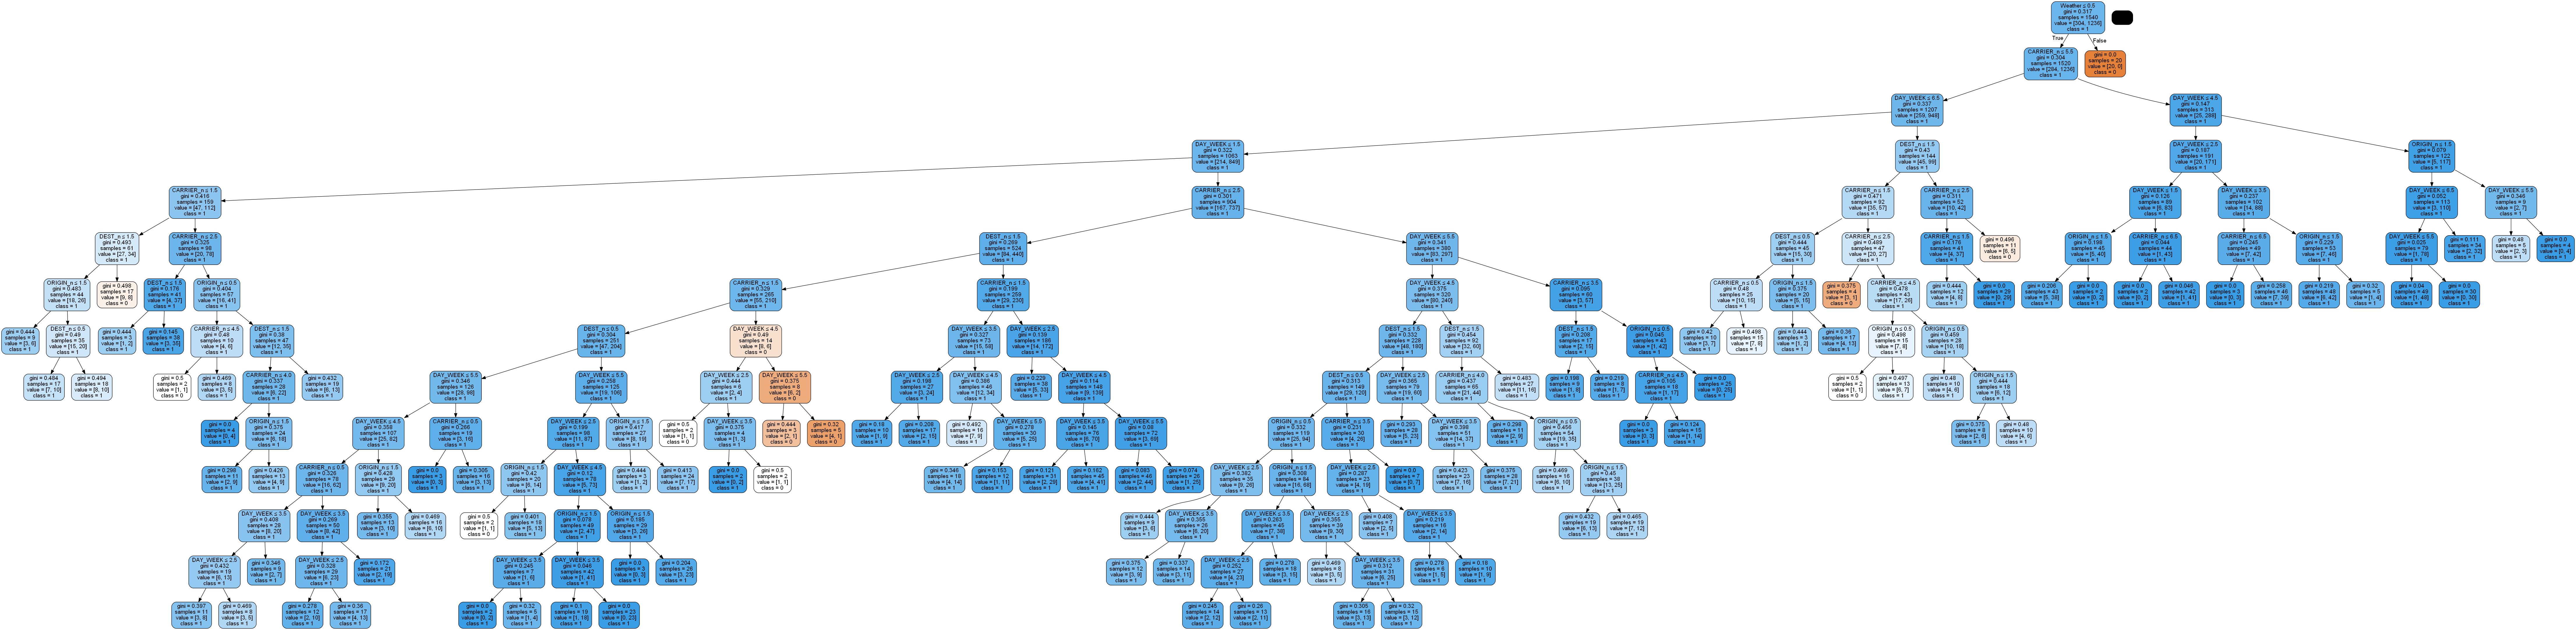

In [72]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = predictor_cart,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('flight_delay.png')
Image(graph.create_png())

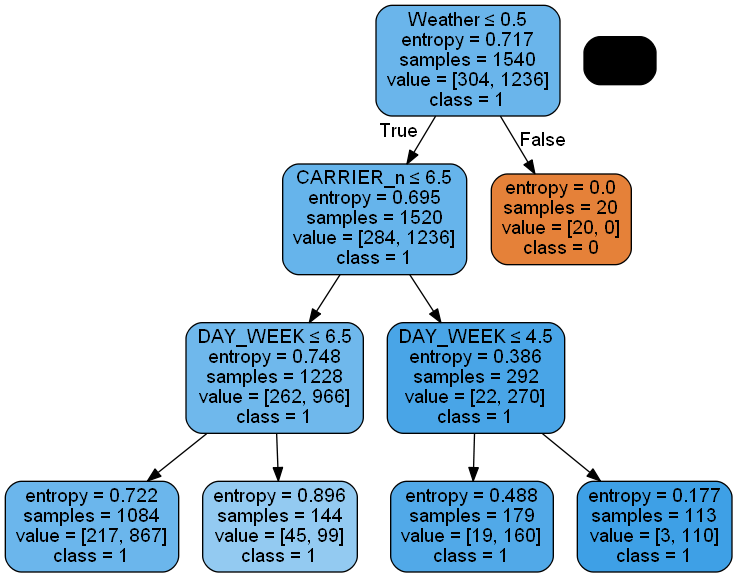

In [85]:

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = predictor_cart,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('flight_cart_inc.png')
Image(graph.create_png())
